In [89]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from tqdm import tqdm

In [90]:
#폰트설정
font_location = "C:/windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc("font", family = font_name)

Malgun Gothic


In [91]:
path = "C:/Users/ad/Desktop/강의자료3-2/금융통계/종목Data/"
files = os.listdir(path)
df_list = []
for i in range(8):
    df1 = pd.read_csv(path+files[2*i])
    df2 = pd.read_csv(path+files[2*i+1])
    df = pd.concat([df2,df1])[["년/월/일","종가"]]
    df["종가"]=df["종가"].apply(lambda x : x.replace(",", ""))
    df.columns=["날짜/종가",files[2*i][:-8]]
    df = df.set_index("날짜/종가")
    df_list.append(df)
price = pd.concat(df_list,axis=1)
price = price.apply(pd.to_numeric)
price = price[::-1]
price

,SK하이닉스,기아차,맥쿼리인프라,삼성SDI,엔씨소프트,유한양행,카카오,하이트진로
날짜/종가,,,,,,,,
2018/01/02,76600,32800,8220,212000,446500,217000,146500,24400
2018/01/03,77700,32600,8230,207500,435000,215500,149000,24800
2018/01/04,77100,31550,8180,208500,422500,212500,156000,24550
2018/01/05,79300,31950,8170,220500,422000,217500,156000,24400
2018/01/08,78200,32400,8140,225500,420000,215000,159500,23850
...,...,...,...,...,...,...,...,...
2019/12/23,94600,44750,11850,228000,540000,243500,148500,27800
2019/12/24,93800,44700,11900,225000,533000,242000,146500,28100
2019/12/26,94800,45100,11900,222500,537000,246000,148000,27900


In [96]:
log_return = np.log(price/price.shift(1)).dropna()
log_return.index.name = "날짜/로그수익률"
log_return = log_return*100
log_return

,SK하이닉스,기아차,맥쿼리인프라,삼성SDI,엔씨소프트,유한양행,카카오,하이트진로
날짜/로그수익률,,,,,,,,
2018/01/03,1.425818,-0.611623,0.121581,-2.145494,-2.609337,-0.693644,1.692088,1.626052
2018/01/04,-0.775198,-3.273870,-0.609386,0.480770,-2.915658,-1.401892,4.590970,-1.013180
2018/01/05,2.813485,1.259859,-0.122324,5.595865,-0.118413,2.325686,0.000000,-0.612872
2018/01/08,-1.396848,1.398624,-0.367873,2.242246,-0.475060,-1.156082,2.218791,-2.279891
2018/01/09,-1.676377,0.308167,-0.122926,-2.696793,0.829880,2.525967,-1.579812,2.688890
...,...,...,...,...,...,...,...,...
2019/12/23,-0.421942,0.111794,1.273903,-0.219058,0.185357,0.824747,-1.005034,0.722025
2019/12/24,-0.849262,-0.111794,0.421053,-1.324523,-1.304772,-0.617922,-1.355953,1.073356
2019/12/26,1.060455,0.890874,0.000000,-1.117330,0.747667,1.639381,1.018685,-0.714289


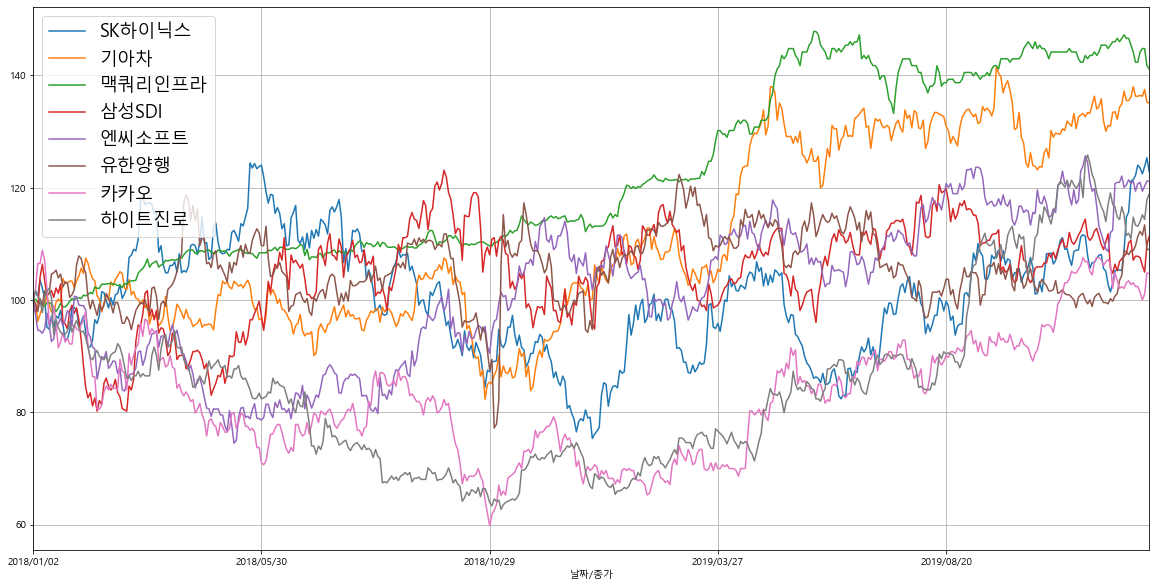

In [16]:
(price/price.iloc[0]*100).plot(figsize=(20,10),grid = True)
plt.legend(loc=2, prop={'size':18})
plt.show()

- Sharp Ratio가 가장 높도록 portfolio를 구성했을 때

import scipy.optimize as sco

mu_p = []
vol_p =[]
for i in range(len(log_return)):
    
    def min_func_sharpe(weights):
        weights = np.array(weights)
        mu_t = np.dot(weights.T, log_return.iloc[i])
        sigma_t = np.sqrt(np.dot(weights.T, np.dot(np.cov(log_return.iloc[i]), weights)))
        return mu_t/sigma_t * -1 
    
    cons =({'type':'eq','fun':lambda x: np.sum(x)-1})
    bnds = tuple((0,1) for x in range(10))
    optimal = sco.minimize(min_func_sharpe, 10*[1./10.], method = "SLSQP",
                    bounds = bnds, constraints = cons)
    opt_w = optimal["x"].round(3)
    
    mu = np.dot(opt_w, log_return.iloc[i])
    mu_p.append(mu)
    vol_p.append(mu**2)

- weight가 모두 0.1로 같도록 포트폴리오를 구성했을 때

In [ ]:
weight = np.array([0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [73]:
mu_p = np.dot(log_return,weight.T)
return_pf = pd.DataFrame({"Portfolio_Return":mu_p}, index = log_return.index.tolist())

vol_pf = pd.DataFrame(return_pf**2, index = log_return.index.tolist())
vol_pf.columns = ["Portfolio_Volatility"]


In [74]:
return_pf

,Portfolio_Return
2018/01/03,-0.038036
2018/01/04,-0.896651
2018/01/05,1.521463
2018/01/08,0.018568
2018/01/09,-0.109121
...,...
2019/12/23,0.116164
2019/12/24,-0.503087
2019/12/26,0.547677
2019/12/27,0.510348


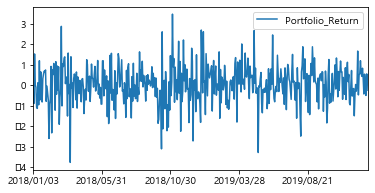

In [93]:
return_pf.plot()
plt.rcParams['figure.figsize']=[6,3]
plt.show()

In [94]:
vol_pf

,Portfolio_Volatility
2018/01/03,0.001447
2018/01/04,0.803983
2018/01/05,2.314850
2018/01/08,0.000345
2018/01/09,0.011907
...,...
2019/12/23,0.013494
2019/12/24,0.253097
2019/12/26,0.299950
2019/12/27,0.260456


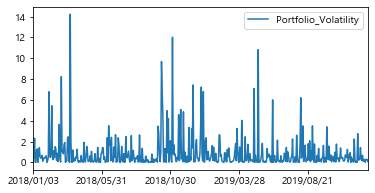

In [95]:
vol_pf.plot()
plt.show()

In [35]:
from arch import arch_model

In [229]:
am = arch_model(return_pf,mean="zero", vol="Garch",p=1,o=0,q=1, dist="normal")
garch = am.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 657.3743446950685
Iteration:      2,   Func. Count:     11,   Neg. LLF: 656.9618685006186
Iteration:      3,   Func. Count:     17,   Neg. LLF: 656.7139945220715
Iteration:      4,   Func. Count:     25,   Neg. LLF: 656.7123143293576
Iteration:      5,   Func. Count:     31,   Neg. LLF: 656.6412947174153
Iteration:      6,   Func. Count:     37,   Neg. LLF: 656.5396835526252
Iteration:      7,   Func. Count:     43,   Neg. LLF: 656.5195412357496
Iteration:      8,   Func. Count:     48,   Neg. LLF: 656.5112920435612
Iteration:      9,   Func. Count:     53,   Neg. LLF: 656.5096487699827
Iteration:     10,   Func. Count:     58,   Neg. LLF: 656.509610218091
Iteration:     11,   Func. Count:     63,   Neg. LLF: 656.5096077978218
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 656.5096077976817
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 11

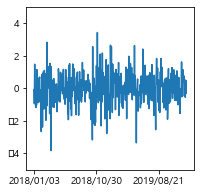

In [211]:
plt.plot(garch.resid)
plt.rcParams['figure.figsize']=[3,3]
plt.xticks(["2018/01/03","2018/10/30","2019/08/21"])
plt.ylim(-5,5)
plt.show()

In [185]:
garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:       Portfolio_Return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -655.810
Distribution:                  Normal   AIC:                           1319.62
Method:            Maximum Likelihood   BIC:                           1336.39
                                        No. Observations:                  489
Date:                Wed, Jun 03 2020   Df Residuals:                      485
Time:                        21:52:45   Df Model:                            4
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0486  4.219e-02      1.152      0.249 [-3.409e-02,  0.131]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0432  2.428e-02      1.778  7.545e-02 [-4.425e-03,9.075e-02]
alpha[1]       0.0438  2.078e-02      2.110  3.490e-02  [3.108e-03,8.458e-02]
beta[1]        0.9066  3.179e-02     28.517 7.261e-179      [  0.844,  0.969]
=============================================================================

Covariance estimator: robust
"""

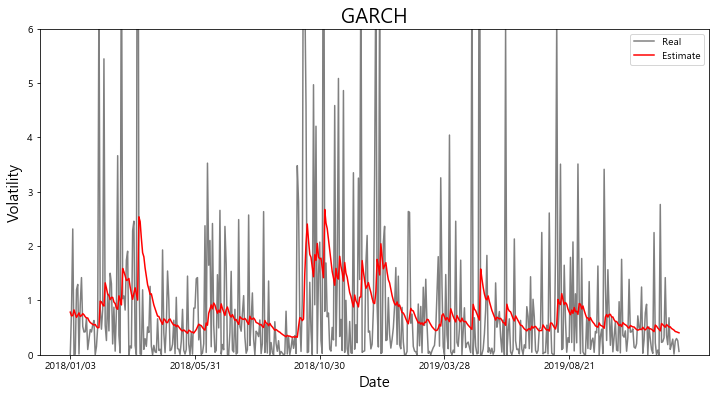

In [240]:
plt.plot(vol_pf,color="gray")
plt.plot(res_garch.conditional_volatility**4, color="r")
plt.title("GARCH",fontsize=20)
plt.ylabel("Volatility",fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(["Real","Estimate"])
plt.xticks(["2018/01/03","2018/05/31","2018/10/30","2019/03/28","2019/08/21"])
plt.rcParams['figure.figsize']=[12,6]
plt.ylim(0,6)
plt.show()

In [151]:
from statsmodels.graphics.tsaplots import plot_acf

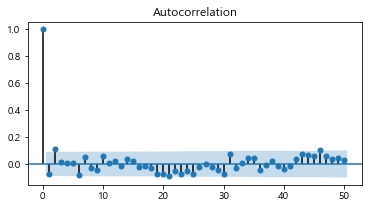

In [153]:
plot_acf(garch.resid,lags=50)
plt.rcParams['figure.figsize']=[6,3]
plt.show()

In [189]:
from sklearn.metrics import mean_squared_error

In [193]:
mse = mean_squared_error(vol_pf, garch.conditional_volatility**2)
mse

2.520604494359118

In [244]:
am = arch_model(return_pf,mean="constant", vol="Garch",p=1,o=1,q=1,dist="normal")
gjr_garch = am.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 654.6068965714094
Iteration:      2,   Func. Count:     18,   Neg. LLF: 654.6060086146795
Iteration:      3,   Func. Count:     28,   Neg. LLF: 654.5957153916952
Iteration:      4,   Func. Count:     36,   Neg. LLF: 654.3021153370714
Iteration:      5,   Func. Count:     44,   Neg. LLF: 654.1683394141695
Iteration:      6,   Func. Count:     52,   Neg. LLF: 653.9833448561546
Iteration:      7,   Func. Count:     60,   Neg. LLF: 653.9161705694946
Iteration:      8,   Func. Count:     68,   Neg. LLF: 653.8212920090908
Iteration:      9,   Func. Count:     76,   Neg. LLF: 653.8027332856387
Iteration:     10,   Func. Count:     84,   Neg. LLF: 653.7937900826537
Iteration:     11,   Func. Count:     91,   Neg. LLF: 653.7911191022504
Iteration:     12,   Func. Count:     98,   Neg. LLF: 653.7873497541331
Iteration:     13,   Func. Count:    105,   Neg. LLF: 653.7872817134091
Iteration:     14,   Func. Count:    112,   Neg. LLF: 653.787268

In [186]:
gjr_garch.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:       Portfolio_Return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -653.787
Distribution:                  Normal   AIC:                           1317.57
Method:            Maximum Likelihood   BIC:                           1338.54
                                        No. Observations:                  489
Date:                Wed, Jun 03 2020   Df Residuals:                      484
Time:                        21:53:27   Df Model:                            5
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0366  4.058e-02      0.902      0.367 [-4.294e-02,  0.116]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0475  3.669e-02      1.295      0.195   [-2.441e-02,  0.119]
alpha[1]   9.3135e-03  2.840e-02      0.328      0.743 [-4.635e-02,6.498e-02]
gamma[1]       0.0585  5.102e-02      1.147      0.251   [-4.146e-02,  0.159]
beta[1]        0.9052  4.563e-02     19.837  1.440e-87      [  0.816,  0.995]
=============================================================================

Covariance estimator: robust
"""

In [194]:
mse = mean_squared_error(vol_pf, gjr_garch.conditional_volatility**2)
mse

2.5013742212669716

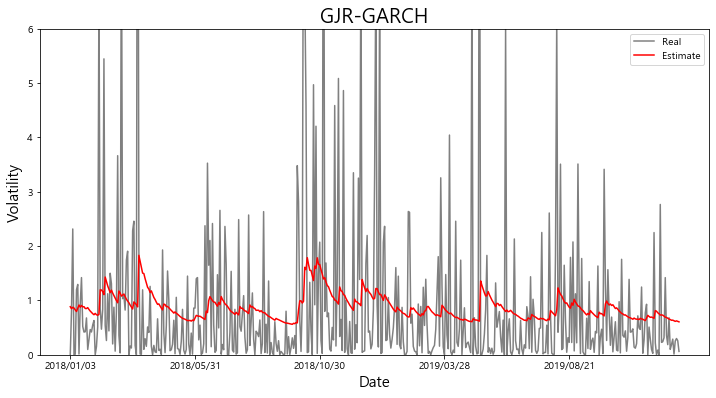

In [245]:
plt.plot(vol_pf,color="gray")
plt.plot(gjr_garch.conditional_volatility**2, color="r")
plt.title("GJR-GARCH",fontsize=20)
plt.ylabel("Volatility",fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(["Real","Estimate"])
plt.xticks(["2018/01/03","2018/05/31","2018/10/30","2019/03/28","2019/08/21"])
plt.rcParams['figure.figsize']=[12,6]
plt.ylim(0,6)
plt.show()

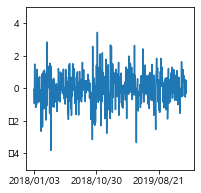

In [177]:
plt.plot(gjr_garch.resid)
plt.ylim(-5,5)
plt.rcParams['figure.figsize']=[3,3]
plt.xticks(["2018/01/03","2018/10/30","2019/08/21"])
plt.show()

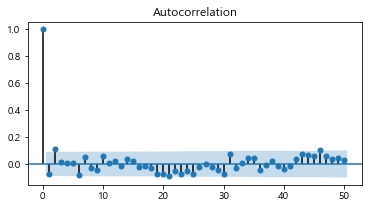

In [168]:
plot_acf(gjr_garch.resid, lags=50)
plt.rcParams['figure.figsize']=[6,3]
plt.show()

In [29]:
?arch_model

In [169]:
am = arch_model(return_pf,mean="constant", vol="EGarch",p=1,o=1,q=1,)
E_garch = am.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 653.1580620359164
Iteration:      2,   Func. Count:     17,   Neg. LLF: 652.9693107815815
Iteration:      3,   Func. Count:     28,   Neg. LLF: 652.9534021394346
Iteration:      4,   Func. Count:     38,   Neg. LLF: 652.9212263047164
Iteration:      5,   Func. Count:     47,   Neg. LLF: 652.9159655097517
Iteration:      6,   Func. Count:     57,   Neg. LLF: 652.9157884137567
Iteration:      7,   Func. Count:     64,   Neg. LLF: 652.9003497213128
Iteration:      8,   Func. Count:     71,   Neg. LLF: 652.8982621022044
Iteration:      9,   Func. Count:     78,   Neg. LLF: 652.898257593473
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 652.8982575934973
            Iterations: 9
            Function evaluations: 78
            Gradient evaluations: 9


In [187]:
E_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:       Portfolio_Return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                     EGARCH   Log-Likelihood:               -652.898
Distribution:                  Normal   AIC:                           1315.80
Method:            Maximum Likelihood   BIC:                           1336.76
                                        No. Observations:                  489
Date:                Wed, Jun 03 2020   Df Residuals:                      484
Time:                        22:27:44   Df Model:                            5
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0394  4.875e-02      0.808      0.419 [-5.615e-02,  0.135]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         -0.0170  5.478e-02     -0.310      0.756  [ -0.124,9.036e-02]
alpha[1]       0.0708  7.568e-02      0.936      0.350 [-7.753e-02,  0.219]
gamma[1]      -0.0960      0.183     -0.525      0.599    [ -0.454,  0.262]
beta[1]        0.8873      0.303      2.925  3.447e-03    [  0.293,  1.482]
===========================================================================

Covariance estimator: robust
"""

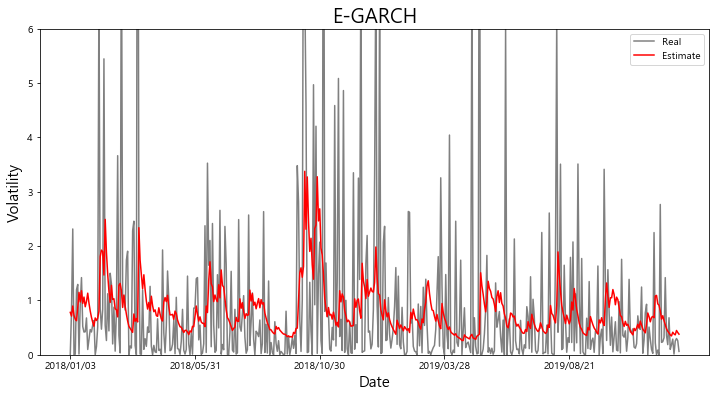

In [239]:
plt.plot(vol_pf,color="gray")
plt.plot(E_garch.conditional_volatility**4, color="r")
plt.title("E-GARCH",fontsize=20)
plt.ylabel("Volatility",fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(["Real","Estimate"])
plt.xticks(["2018/01/03","2018/05/31","2018/10/30","2019/03/28","2019/08/21"])
plt.rcParams['figure.figsize']=[12,6]
plt.ylim(0,6)
plt.show()

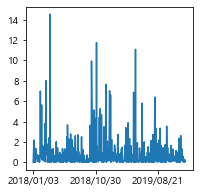

In [207]:
plt.plot(E_garch.resid**2)
plt.rcParams['figure.figsize']=[3,3]
plt.xticks(["2018/01/03","2018/10/30","2019/08/21"])
plt.show()

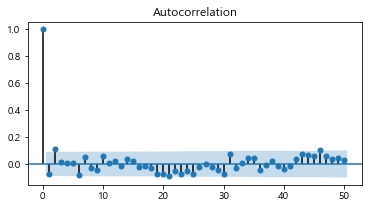

In [184]:
plot_acf(E_garch.resid, lags=50)
plt.rcParams['figure.figsize']=[6,3]
plt.show()

In [195]:
mse = mean_squared_error(vol_pf, E_garch.conditional_volatility**2)
mse

2.4861506899405983

In [196]:
def qlike(obs, fore):
    a =[]
    for i in range(len(obs)):
        div = obs.iloc[i]/fore.iloc[i]
        b = div - 1 - np.log(div)
        a.append(b)
    return sum(a)

In [200]:
qlike(vol_pf,garch.conditional_volatility**2)

Portfolio_Volatility    671.004682
dtype: float64

In [201]:
qlike(vol_pf,gjr_garch.conditional_volatility**2)

Portfolio_Volatility    668.237748
dtype: float64

In [203]:
qlike(vol_pf,E_garch.conditional_volatility**2)

Portfolio_Volatility    661.589472
dtype: float64